In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
data = pd.read_csv('Labeled-Amazon-Reviews-Dataset.csv')
data.head()

,Name,Price,Availability,Brand,Description,Category,Rating,Review,Star,Date,Labels
0,"BIC Wite-Out Brand EZ Correct Correction Tape,...",17,Out of Stock,Visit the BIC Store,"Make fast, easy and precise corrections on eve...",Office Products,4.4,frustrating because they sometimes get screwed...,5.0 out of 5 stars,"Reviewed in the United States on May 14, 2024",negative
1,"BIC Wite-Out Brand EZ Correct Correction Tape,...",17,Out of Stock,Visit the BIC Store,"Make fast, easy and precise corrections on eve...",Office Products,4.4,"I love these! They are super easy to use, ther...",5.0 out of 5 stars,"Reviewed in the United States on May 17, 2024",positive
2,"BIC Wite-Out Brand EZ Correct Correction Tape,...",17,Out of Stock,Visit the BIC Store,"Make fast, easy and precise corrections on eve...",Office Products,4.4,"not the best quality, but it works",5.0 out of 5 stars,"Reviewed in the United States on April 12, 2024",positive
3,"BIC Wite-Out Brand EZ Correct Correction Tape,...",17,Out of Stock,Visit the BIC Store,"Make fast, easy and precise corrections on eve...",Office Products,4.4,"If you’re like me, I still like to write on a ...",4.0 out of 5 stars,"Reviewed in the United States on March 9, 2024",positive
4,"BIC Wite-Out Brand EZ Correct Correction Tape,...",17,Out of Stock,Visit the BIC Store,"Make fast, easy and precise corrections on eve...",Office Products,4.4,"As an office manager, I go through my fair sha...",5.0 out of 5 stars,"Reviewed in the United States on April 14, 2024",positive


In [43]:
#unique values in each column
data.nunique()

Name             24
Price            20
Availability      3
Brand            22
Description      22
Category         10
Rating            8
Review          275
Star              5
Date            190
Labels            3
dtype: int64

Here I want to replace long product names with short names

In [44]:
import pandas as pd


# Define a dictionary with long product names as keys and short product names as values
replacement_dict = {
    "BIC Wite-Out Brand EZ Correct Correction Tape, 39.3 Feet, 2-Count Pack of white Correction Tape, Fast, Clean and Easy to Use Tear-Resistant Tape Office or School Supplies": "BIC Wite-Out Brand EZ Correct Correction Tape",
    "Dove Nourishing Secrets Hydrating Shampoo Coconut and Hydration 6 Count for Daily Use Dry Hair Shampoo With Refreshing Lime Scent 12 oz": "Dove Nourishing Secrets Hydrating Shampoo",
    "LEGO Easter Rabbits Display 40523 Building Toy Set, Includes Colorful Easter Eggs and Tulips, Easter Decorations": "LEGO Easter Rabbits Toy Set",
    "L'Oreal Paris Makeup True Match Lumi Glotion, Natural Glow Enhancer, Illuminator Highlighter Skin Tint, for an All Day Radiant Glow, Medium, 1.35 Ounces": "L'Oreal Paris Makeup True Match Lumi Glotion",
    "STANLEY IceFlow Stainless Steel Tumbler with Straw, Vacuum Insulated Water Bottle for Home, Office or Car, Reusable Cup with Straw Leak Resistant Flip": "STANLEY IceFlow Stainless Steel Tumbler",
    "Gloria Vanderbilt Womens Amanda Classic High Rise Tapered Jean Petite": "Gloria Vanderbilt Amanda Classic Jean",
    "Gibson Elite Mayfair Bay Embossed Double Bowl Dinnerware Set, Service for 4 (16pcs), Blue": "Gibson Elite Mayfair Embossed Dinnerware Set",
    "e.l.f. Camo Powder Foundation, Lightweight, Primer-Infused Buildable & Long-Lasting Medium-to-Full Coverage Foundation, Tan 400 W": "e.l.f. Camo Powder Foundation",
    "e.l.f. Holy Hydration! Makeup Melting Cleansing Balm, Face Cleanser & Makeup Remover, Infused with Hyaluronic Acid to Hydrate Skin, 2 Oz": "e.l.f. Holy Hydration! Cleansing Balm",
    "Amazon Essentials Men's Slim-Fit Long-Sleeve T-Shirt": "Amazon Essentials Men's Slim-Fit T-Shirt",
    "Pleasures By Estee Lauder For Women. Eau De Parfum Spray 3.4 Ounces": "Pleasures By Estee Lauder Eau De Parfum Spray",
    "Pelican iPhone 12 / iPhone 12 Pro Case with Tempered Glass Screen Protector [Wireless Charging Compatible] [15ft MIL-Grade Drop Protection] Anti-Yellowing Phone Cover for iPhone 12 / 12 Pro - Clear": "Pelican iPhone 12 Case",
    "Crayola Washable Kids Paint Set (12ct), Classic and Glitter Paint for Kids, Arts & Crafts Supplies, Toddler Painting Kit, 3+ [Amazon Exclusive]": "Crayola Washable Kids Paint Set",
    "Amazon Basics Woodcased #2 Pencils, Pre-sharpened, HB Lead Bulk Box, 150 Count, Yellow": "Amazon Basics Woodcased #2 Pencils",
    "EXPO Low Odor Dry Erase Markers, Chisel Tip, Assorted Colors, 12 Count": "EXPO Low Odor Dry Erase Markers",
    "Razer Ornata V3 X Gaming Keyboard: Low-Profile Keys - Silent Membrane Switches - Spill Resistant - Chroma RGB Lighting - Ergonomic Wrist Rest - Classic Black": "Razer Ornata V3 X Gaming Keyboard",
    "SWAROVSKI women Crystal Duo Evil Eye Rose Gold-Plated Necklace": "SWAROVSKI Evil Eye Rose Gold-Plated Necklace",
    "Dr. Scholl's Shoes Women's Webster Loafer": "Dr. Scholl's Shoes Women's Loafer",
    "e.l.f. Monochromatic Multi Stick, Luxuriously Creamy & Blendable Color, For Eyes, Lips & Cheeks, Dazzling Peony, 0.17 oz (5 g)": "e.l.f. Monochromatic Multi Stick",
    "wet n wild MegaGlo Dual-Ended Contour Stick, Light Medium, Cruelty-Free": "wet n wild MegaGlo Dual-Ended Contour Stick",
    "MEDIHEAL Toner Pad (Retinol Collagen Pad)": "MEDIHEAL Toner Pad",
    "Cetaphil Baby Eczema Soothing Lotion, Colloidal Oatmeal, Paraben Free, Hypoallergenic, Dry Skin, 10 Fluid Ounce": "Cetaphil Baby Eczema Soothing Lotion",
    "King of Sloth (Kings of Sin, 4)": "King of Sloth",
    "Under Armour Women's Ignite Select Slide Sandal": "Under Armour Women's Ignite Select Sandal",


}

# Replace the long product names with the short ones
data['Name'] = data['Name'].replace(replacement_dict)



In [45]:
replacement_dict={
    "5.0 out of 5 stars":5,
    "4.0 out of 5 stars":4,
    "3.0 out of 5 stars":3,
    "2.0 out of 5 stars":2,
    "1.0 out of 5 stars":1
}
# Replace the Star column values with numerical values
data['Star'] = data['Star'].replace(replacement_dict)

In [46]:
# Save the modified dataframe to a new file
#data.to_csv('modified_file.csv', index=False)

In [47]:
data.tail(10)

,Name,Price,Availability,Brand,Description,Category,Rating,Review,Star,Date,Labels
306,King of Sloth,9,In Stock,by Ana Huang (Author),NaN,Books,4.2,I think this one is my favorite of all king of...,NaN,NaN,positive
307,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,Great purchase. Quick to put on and very comfo...,5.0,"Reviewed in the United States on May 20, 2024",positive
308,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,"Run a little small, but still close to true to...",5.0,"Reviewed in the United States on May 8, 2024",neutral
309,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,These are super comfy! I work at an indoor poo...,5.0,"Reviewed in the United States on April 23, 2024",positive
310,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,Love these slides! Super comfortable,4.0,"Reviewed in the United States on April 7, 2024",positive
311,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,I bought the pink and black ones. I like the l...,3.0,"Reviewed in the United States on April 27, 2024",neutral
312,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,My mom loved the slippers ! They were very com...,5.0,"Reviewed in the United States on May 9, 2024",positive
313,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,Llegaron a tiempo y el producto es muy bueno y...,5.0,"Reviewed in the United States on May 17, 2024",neutral
314,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,NaN,5.0,"Reviewed in the United States on April 14, 2024",neutral
315,Under Armour Women's Ignite Select Sandal,29,In Stock,Visit the Under Armour Store,"The memory foam not only feels great, but also...","Clothing, Shoes & Jewelry",4.3,So cute and comfortable and true to size. Love...,NaN,NaN,positive


In [48]:
data.dtypes

Name             object
Price             int64
Availability     object
Brand            object
Description      object
Category         object
Rating          float64
Review           object
Star            float64
Date             object
Labels           object
dtype: object

Bic correction tape 

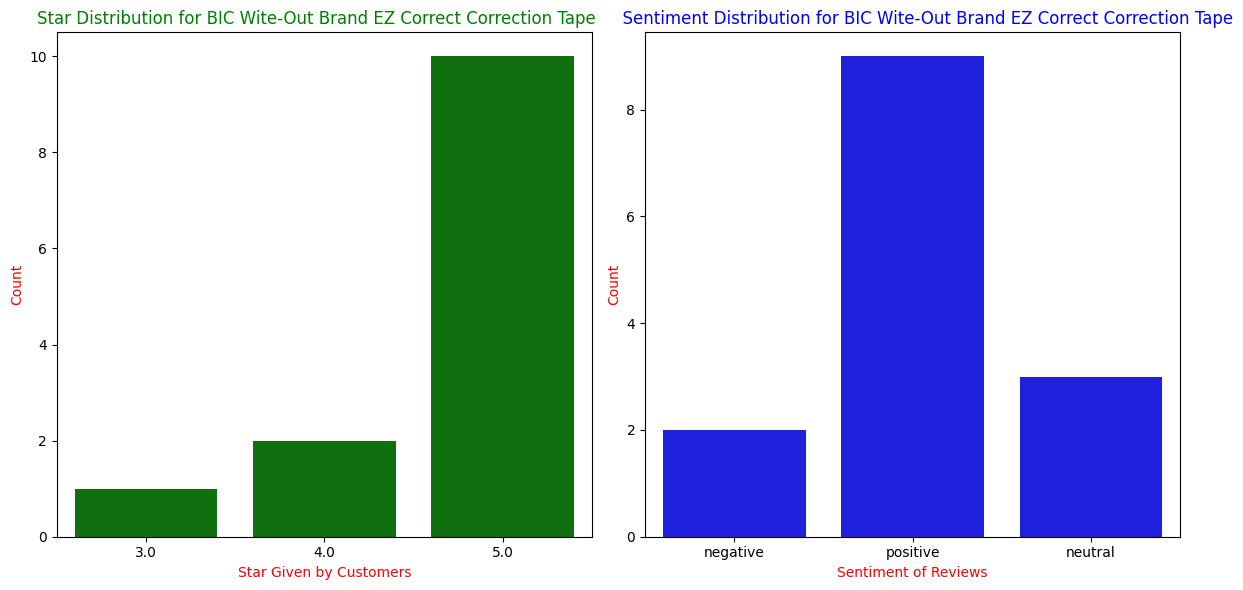

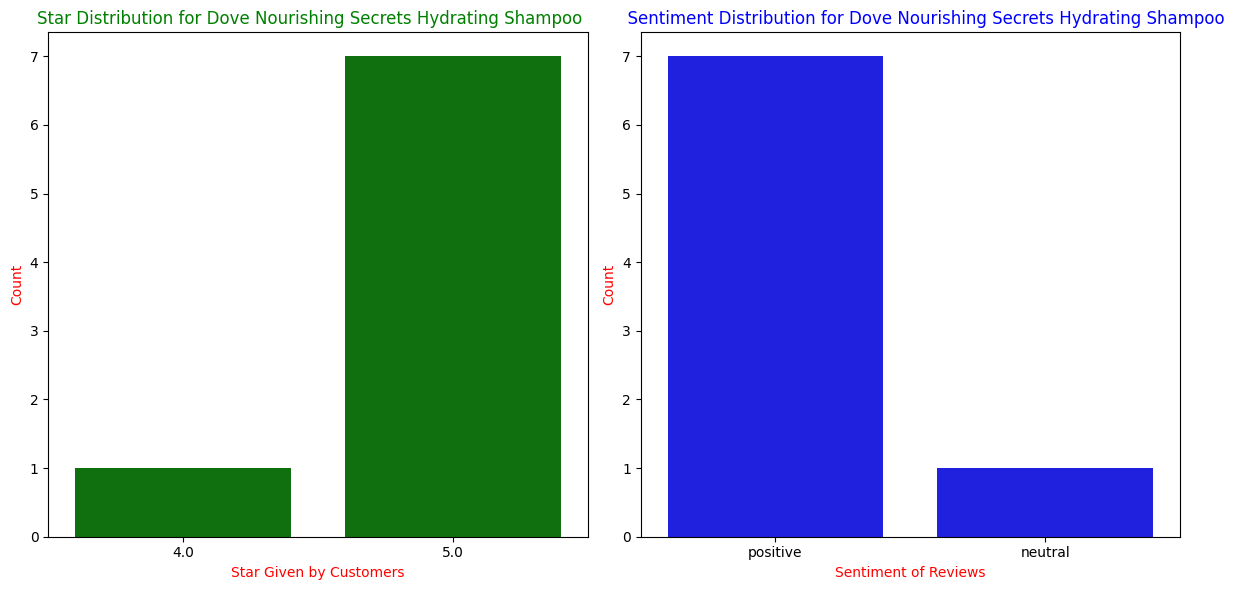

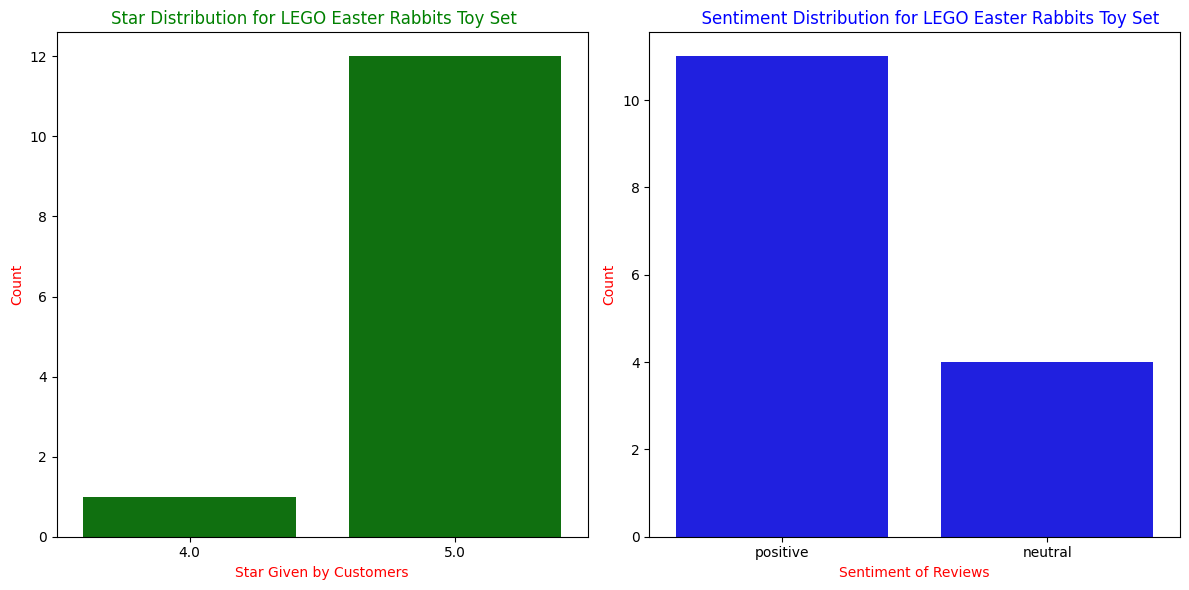

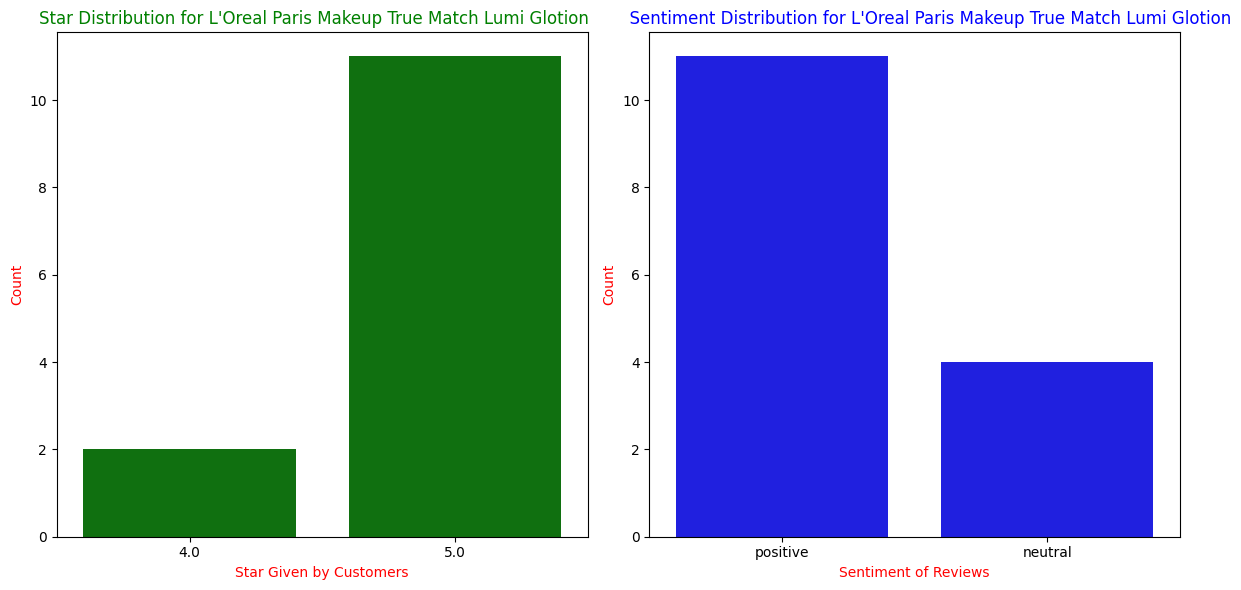

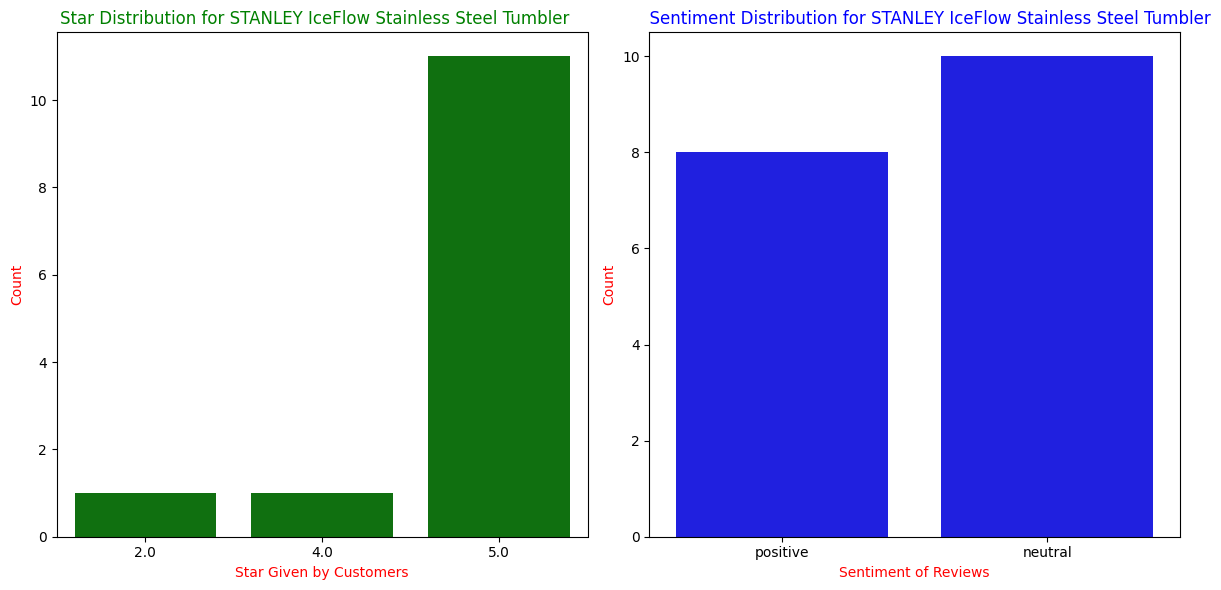

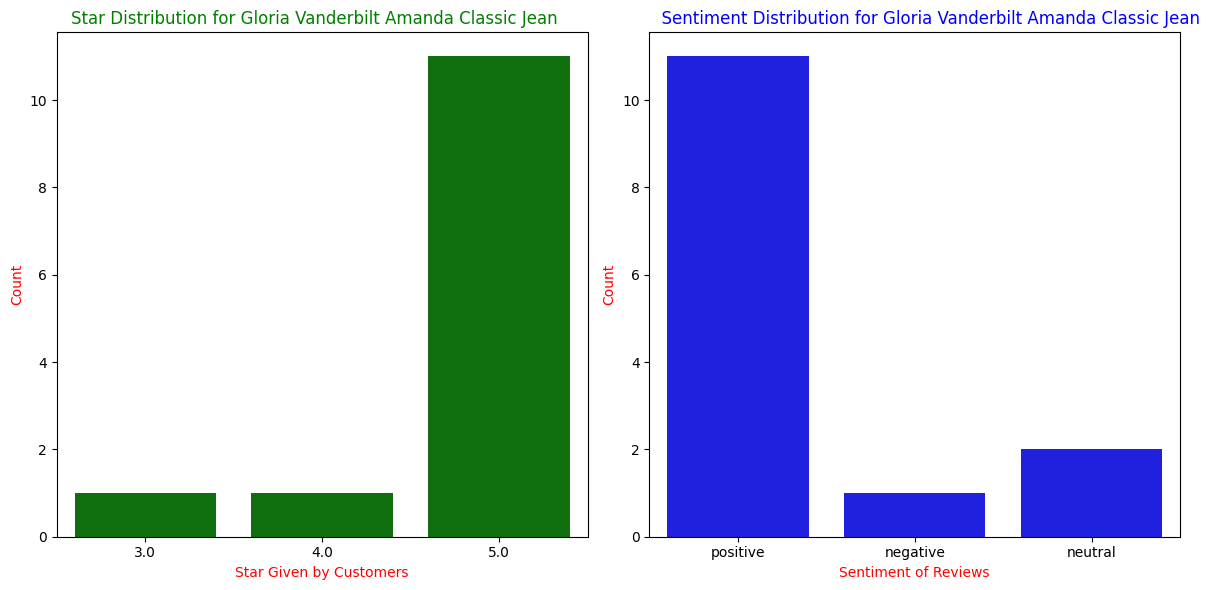

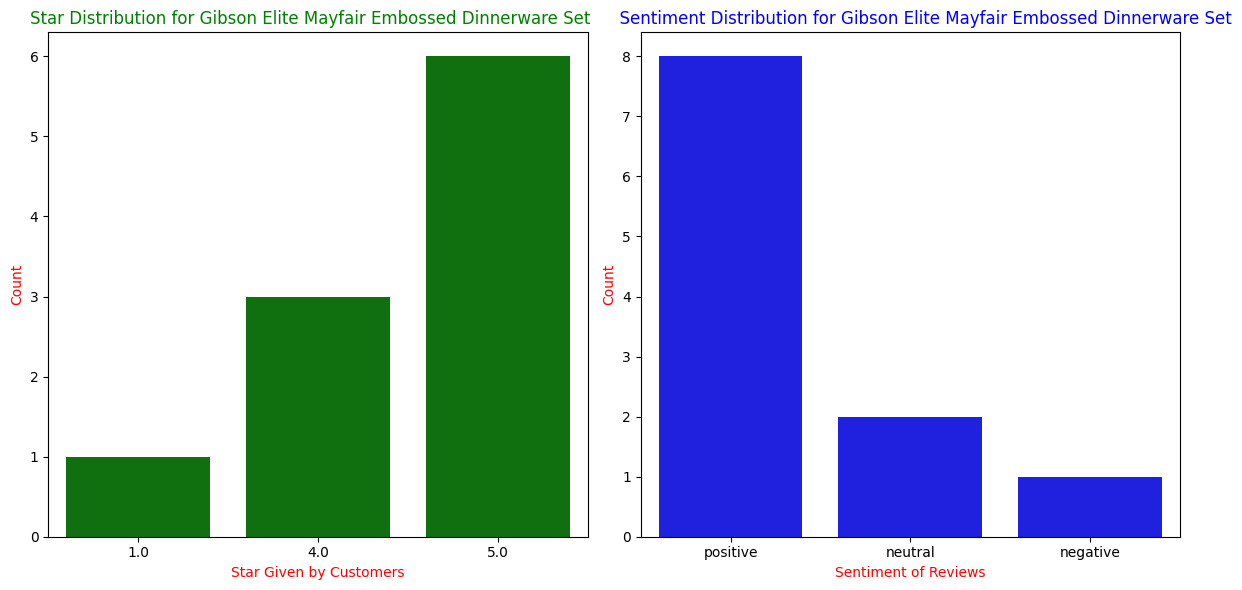

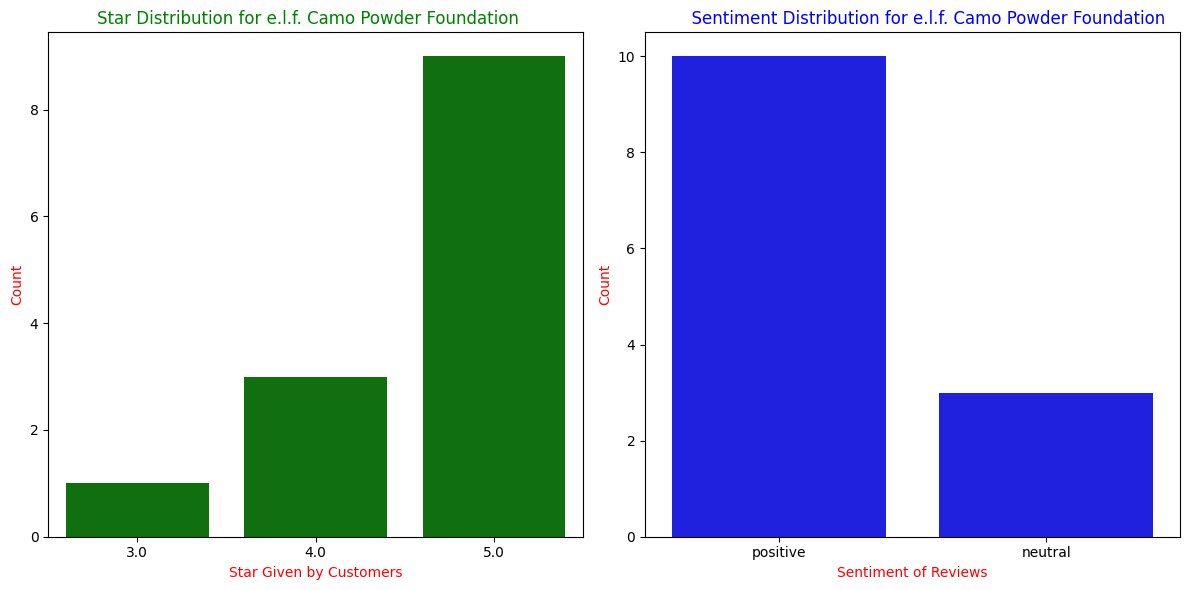

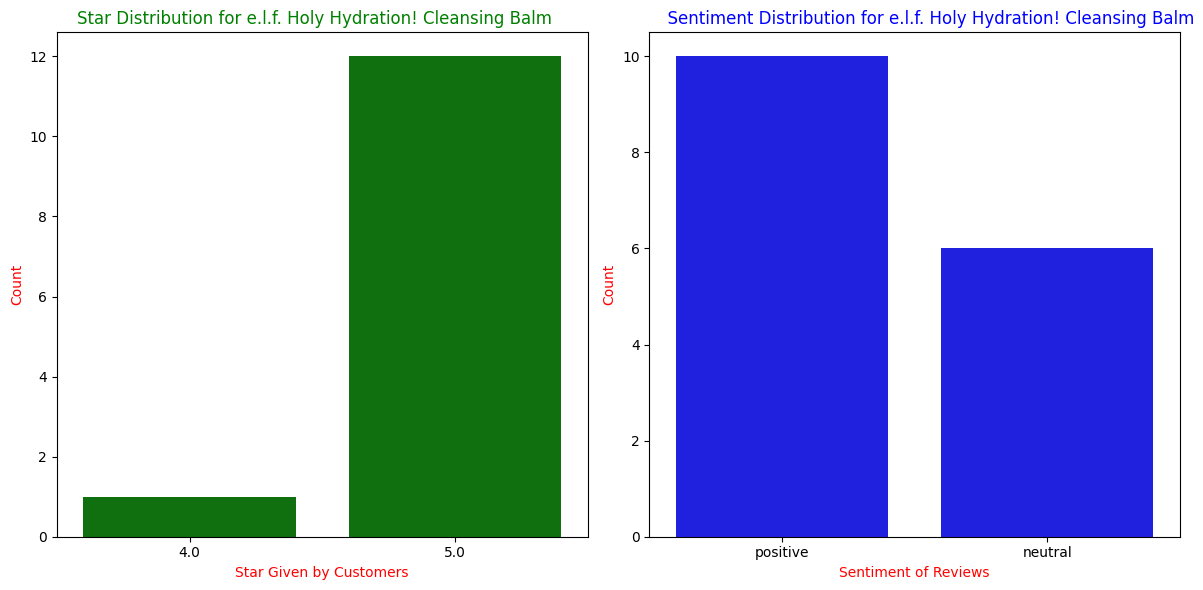

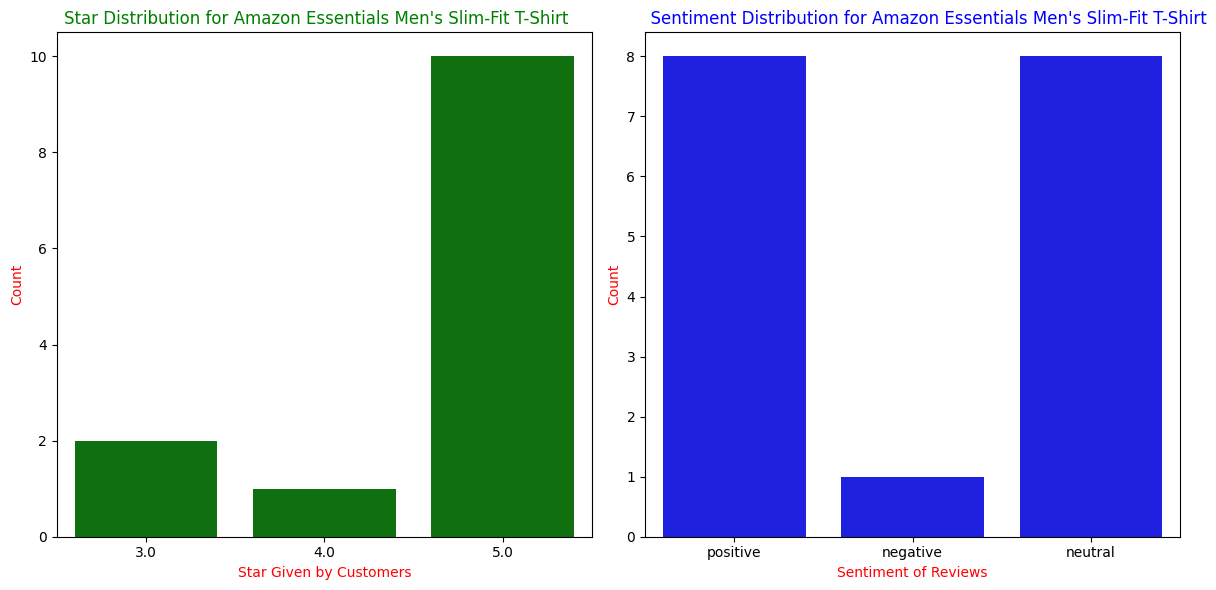

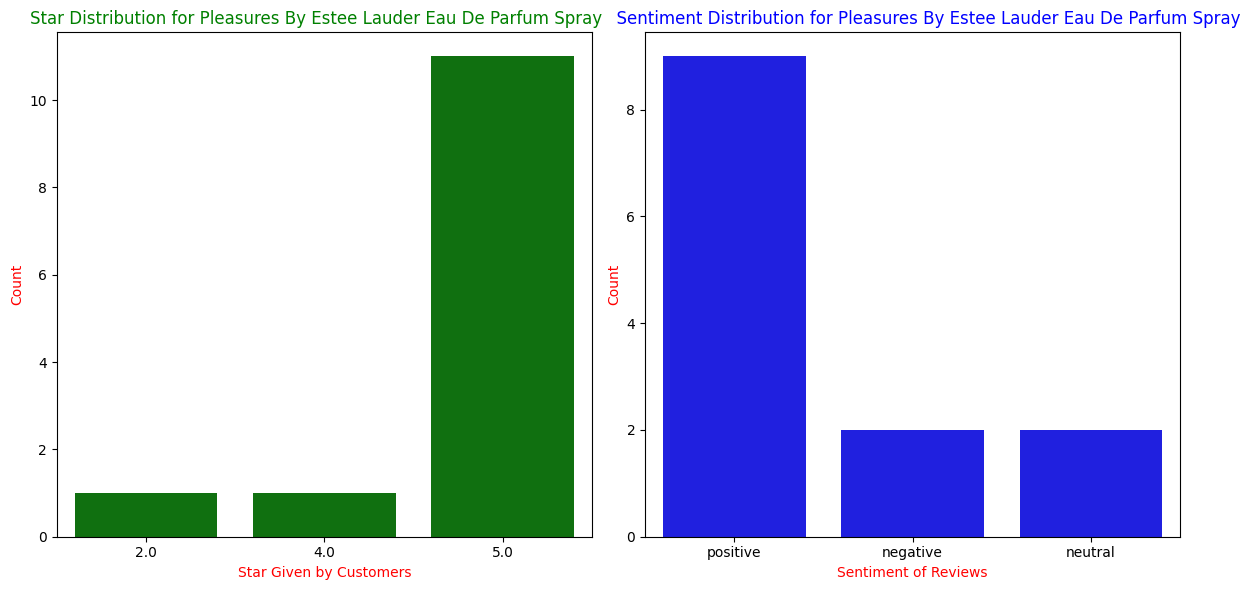

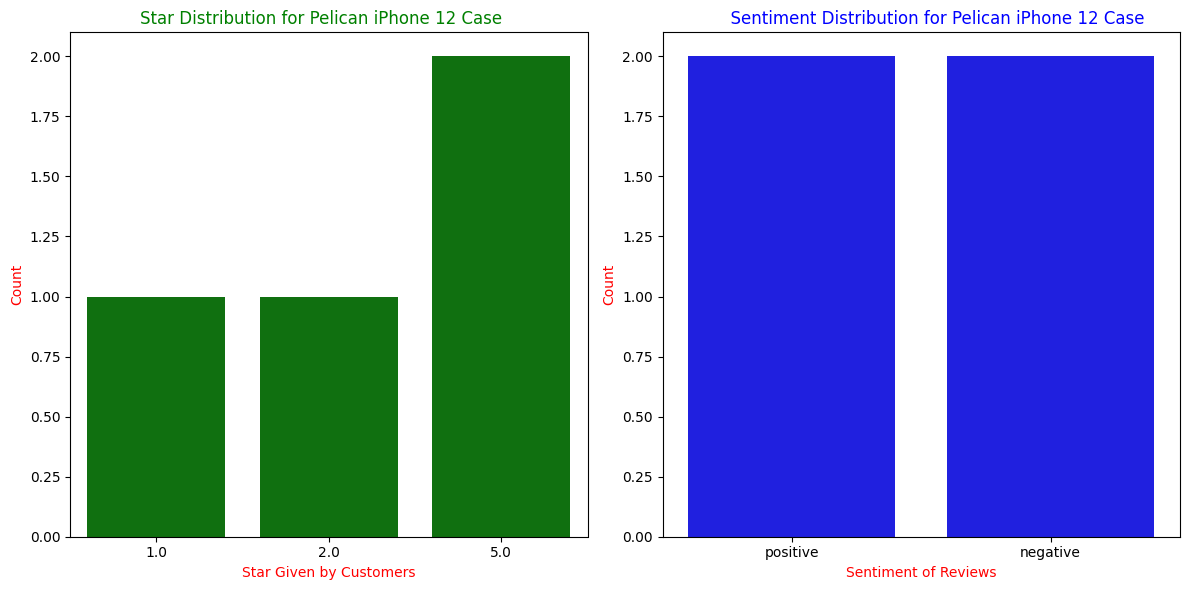

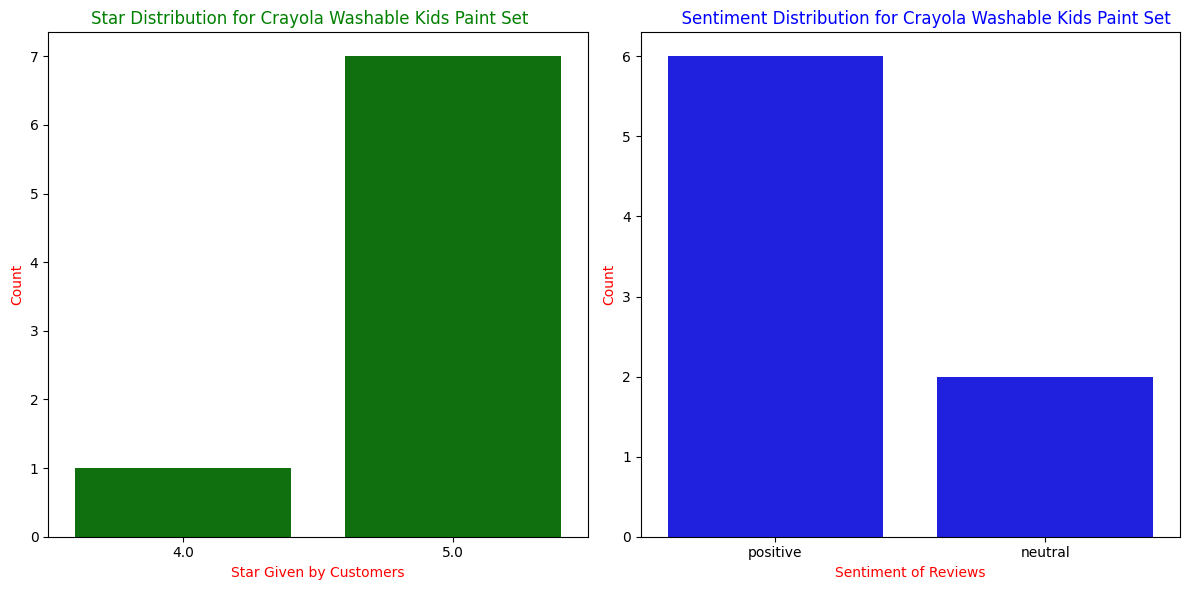

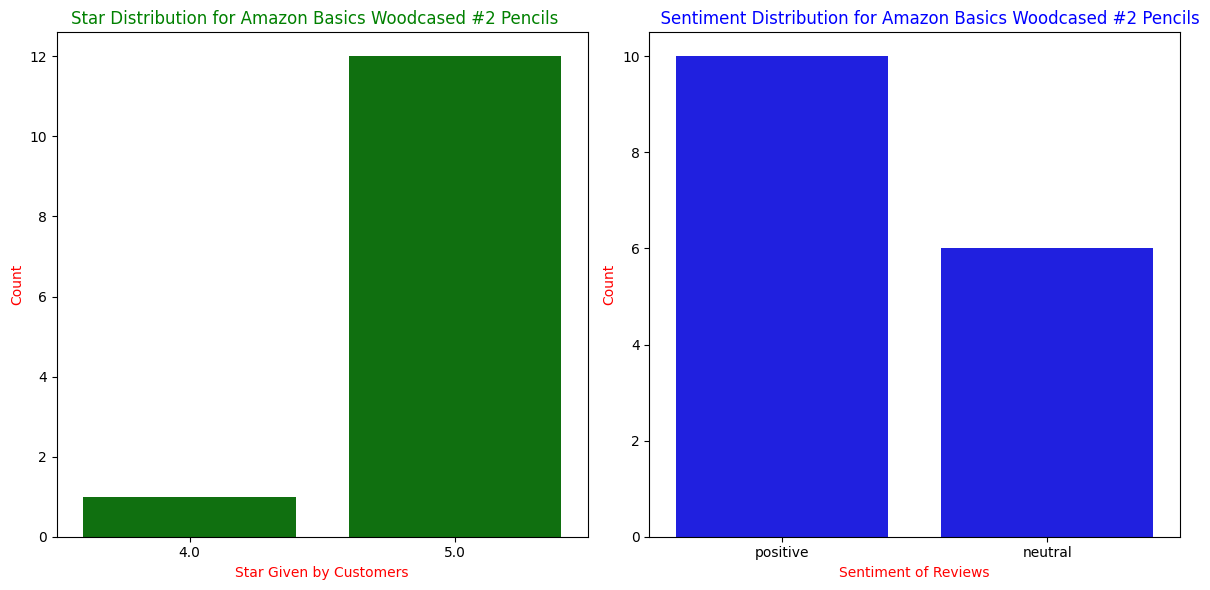

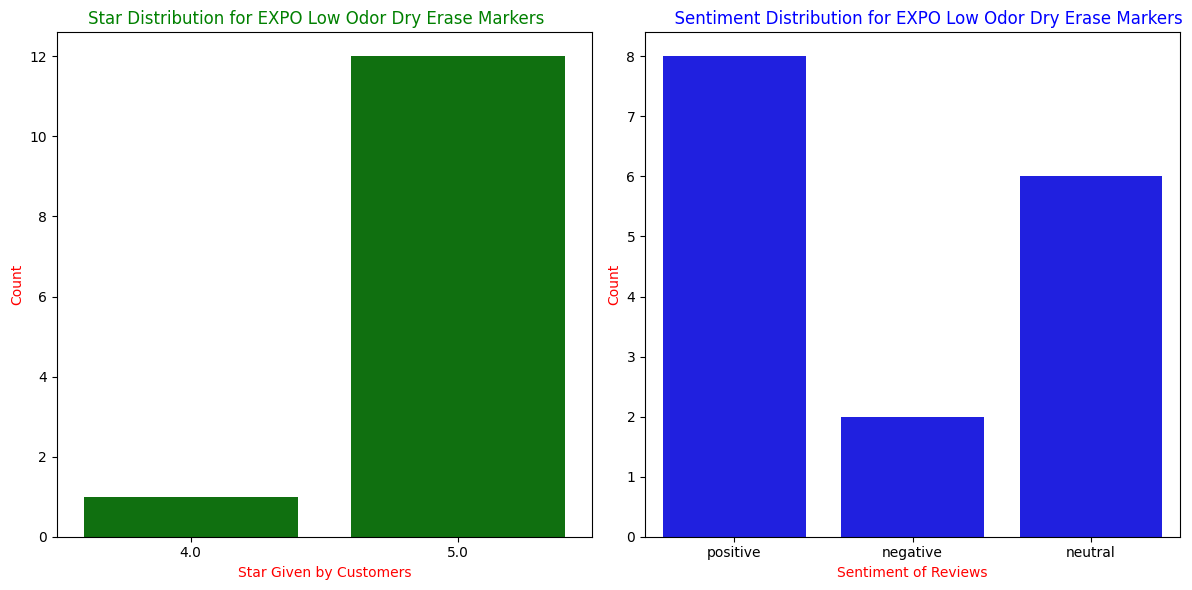

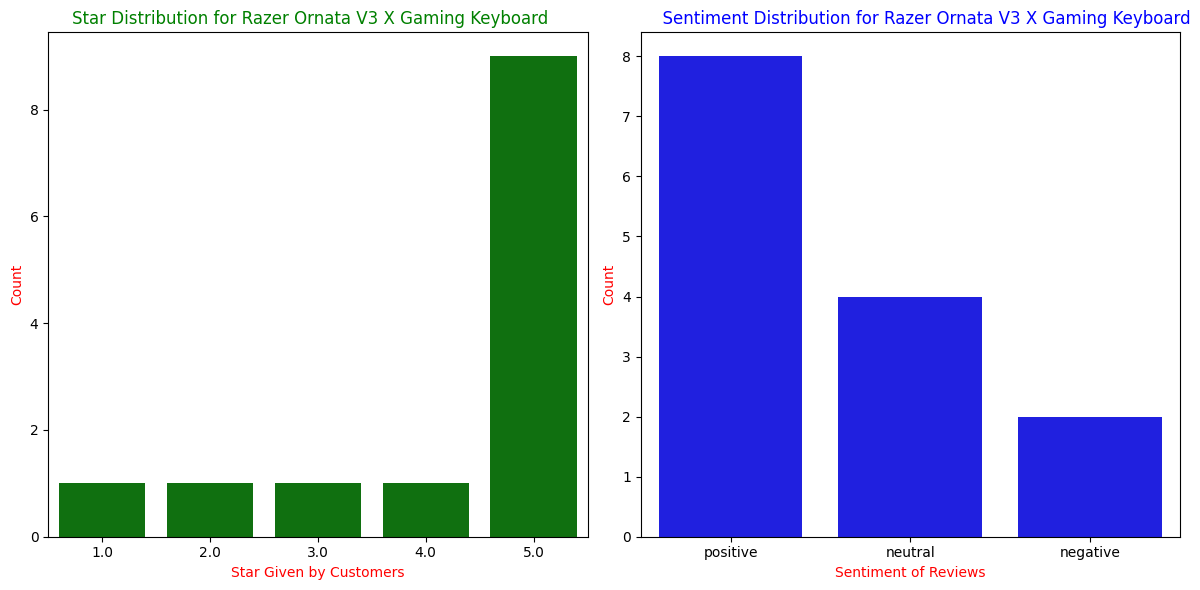

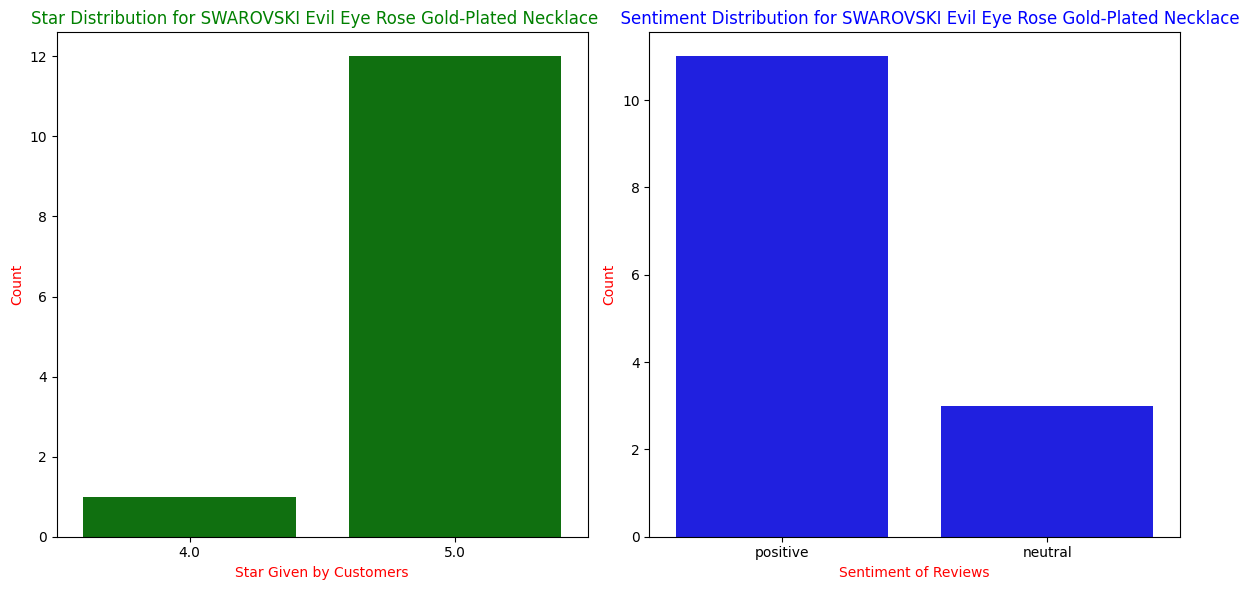

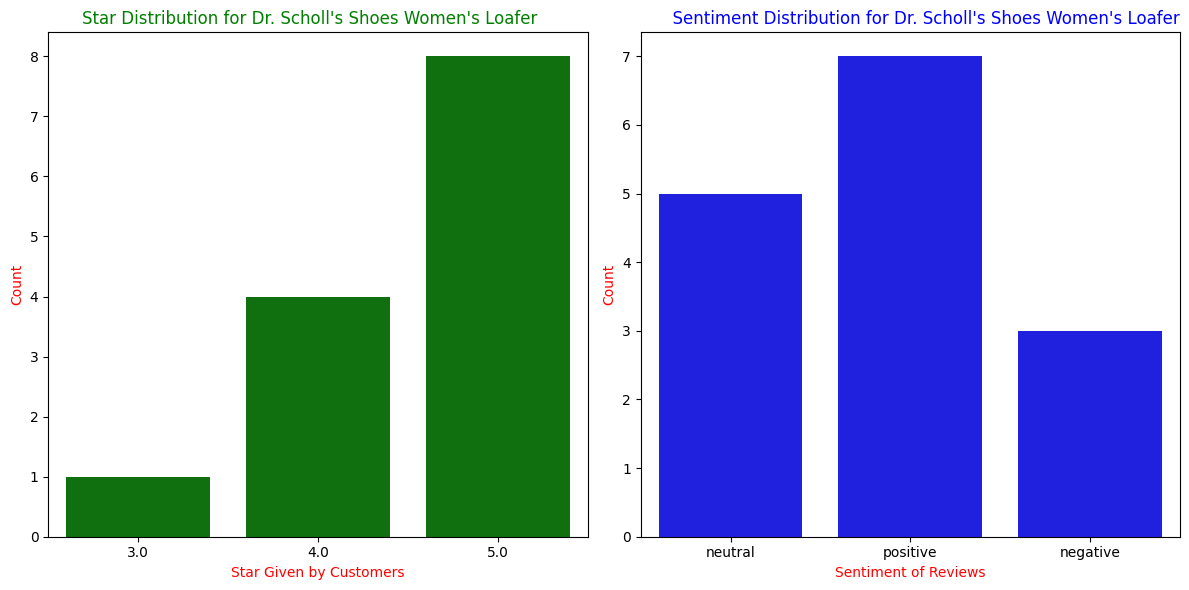

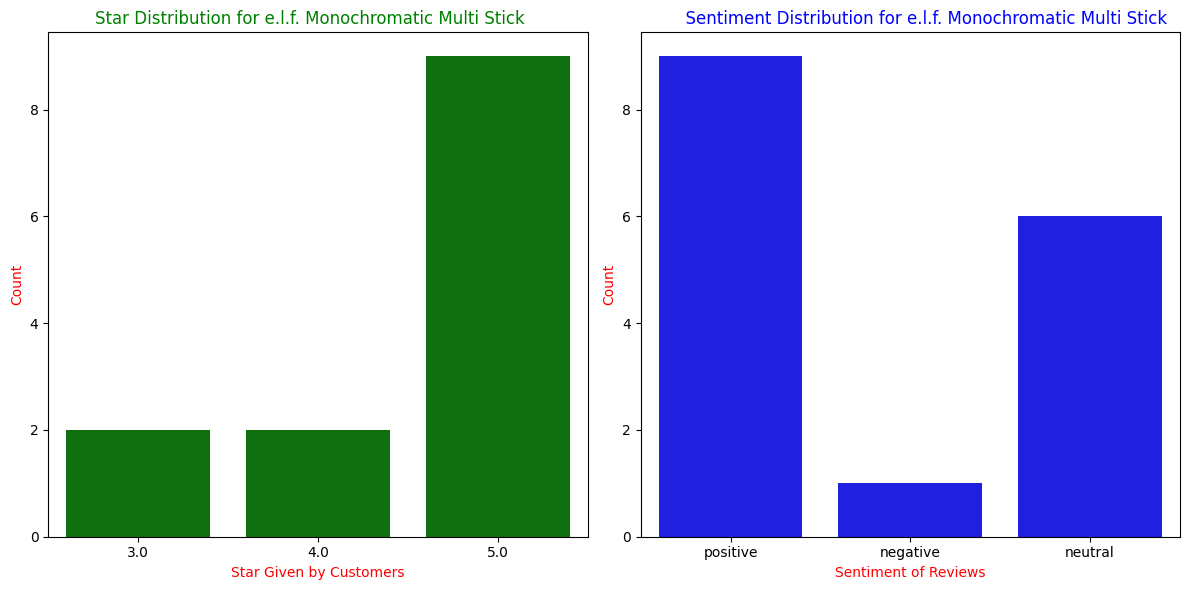

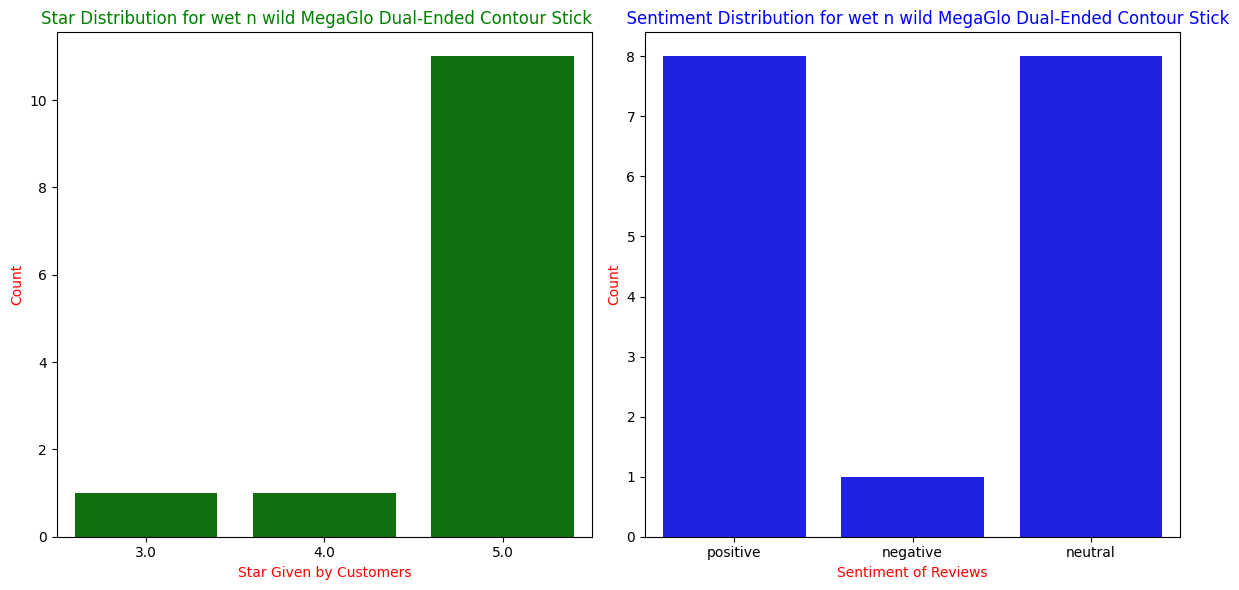

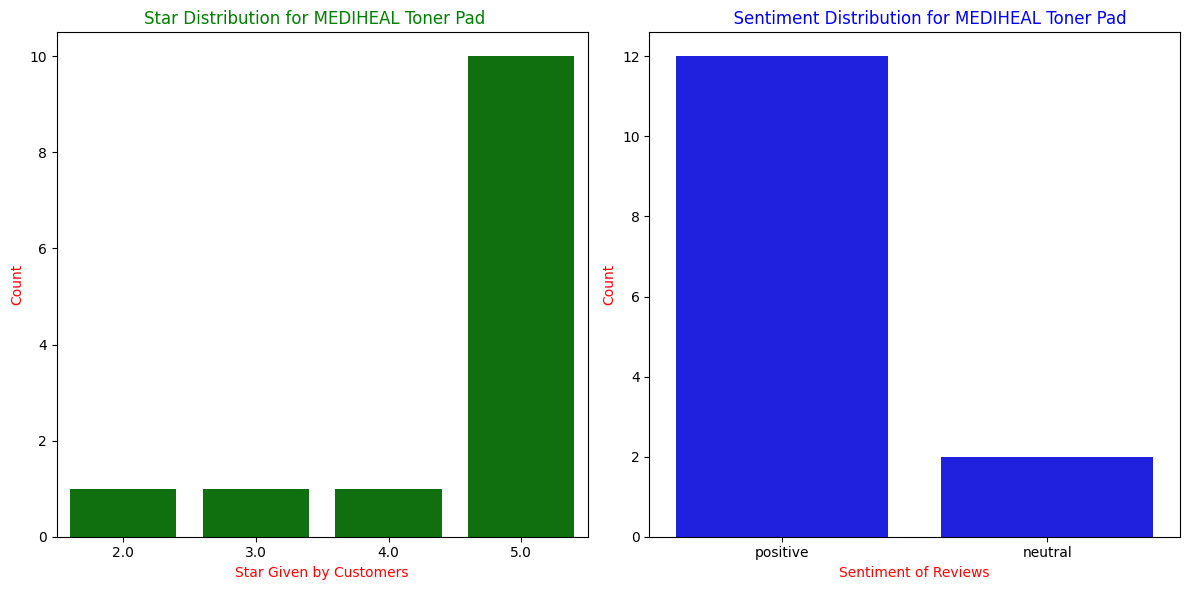

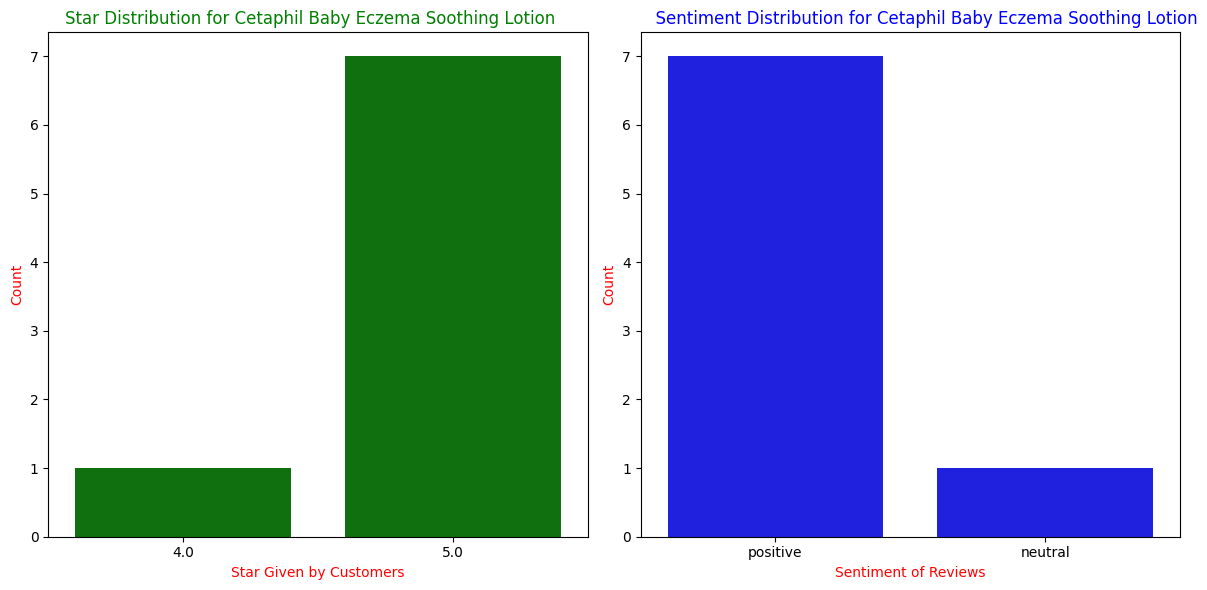

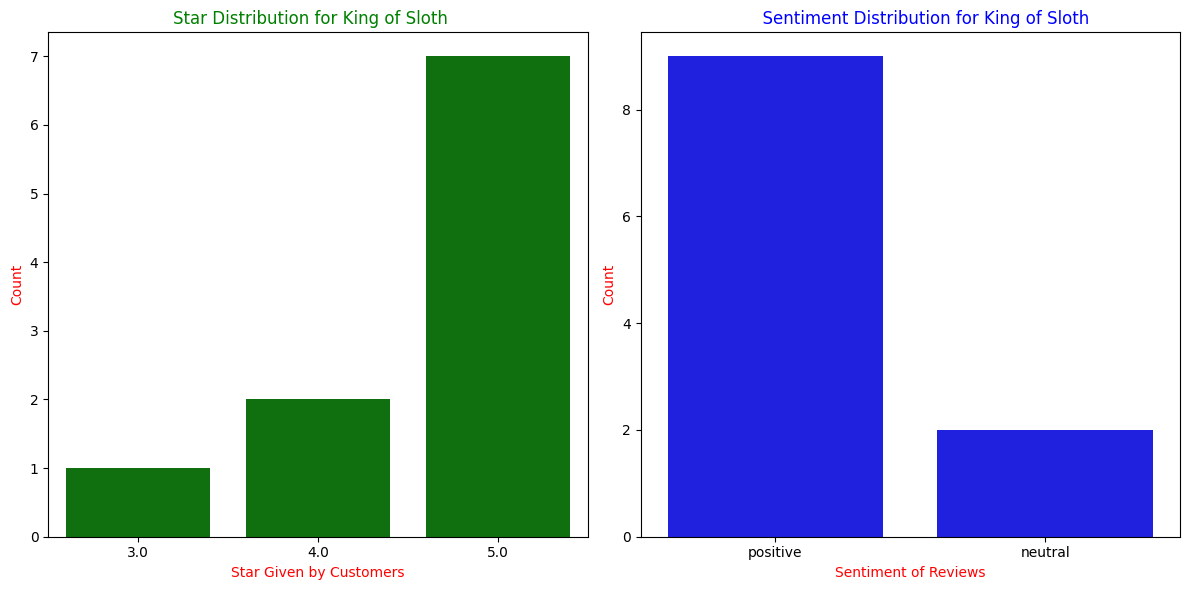

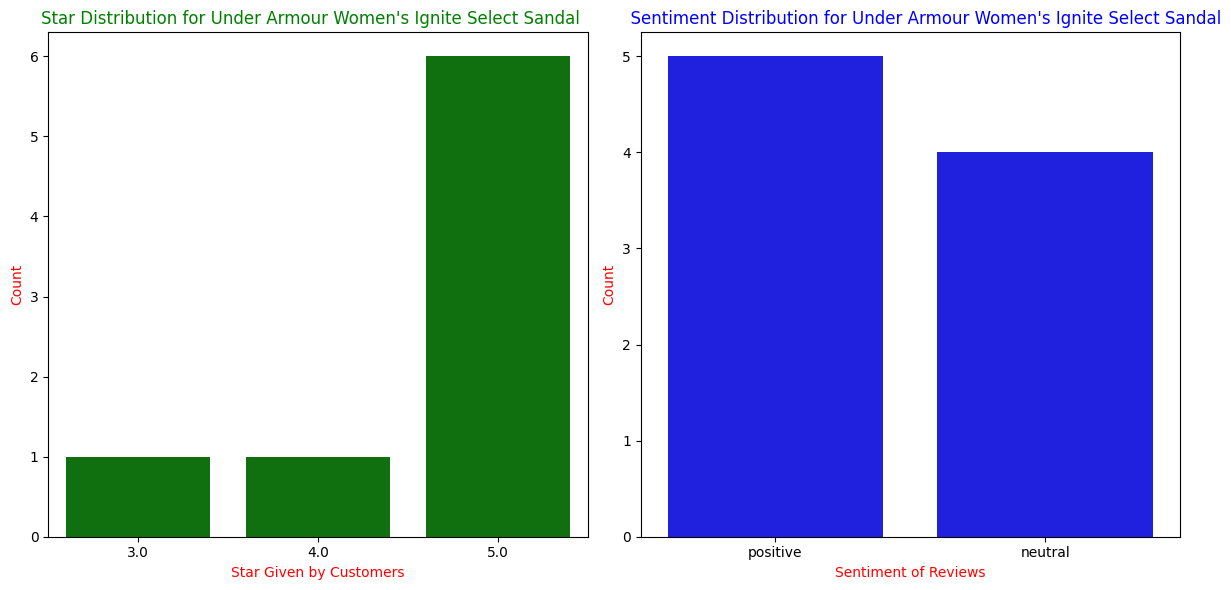

In [49]:
# Ensure the plots are displayed inline
%matplotlib inline

# Function to plot data for a specific product
def plot_product_data(df, product_name):
    product_df = data[data['Name'] == product_name]
    
    # Plotting the star distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=product_df, x='Star',color="green")
    plt.title(f'Star Distribution for {product_name}   ',color="green")
    plt.xlabel('Star Given by Customers',color="red")
    plt.ylabel('Count',color="red")
    
    # Plotting the sentiment distribution
    plt.subplot(1, 2, 2)
    sns.countplot(data=product_df, x='Labels',color="blue")
    plt.title(f'      Sentiment Distribution for {product_name}',color="blue")
    plt.xlabel("Sentiment of Reviews",color="red")
    plt.ylabel('Count',color="red")
    
    plt.tight_layout()
    plt.show()

# Example: Plotting for 'BIC Wite-Out Brand EZ Correct Correction Tape'
#plot_product_data(data, 'BIC Wite-Out Brand EZ Correct Correction Tape')
# Get the list of unique product names
product_names = data['Name'].unique()

# Loop through each product and plot the data
for product_name in product_names:
    plot_product_data(data, product_name)


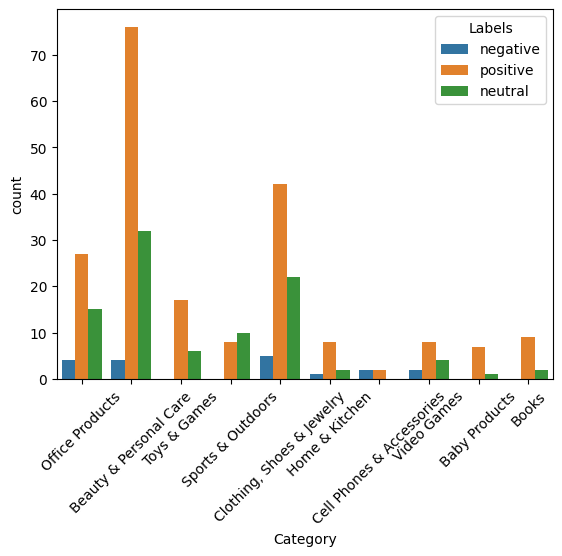

In [50]:
#visualize category wise labels
sns.countplot(data=data, x='Category', hue='Labels')
plt.xticks(rotation=45)
plt.show()

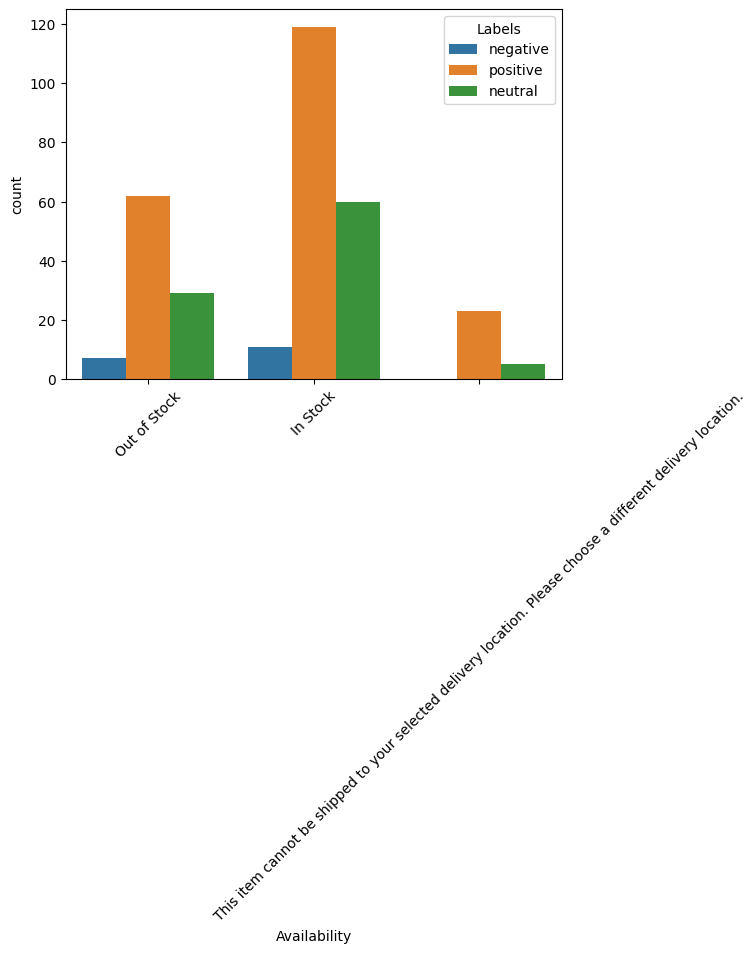

In [51]:
#visualize brand wise labels
sns.countplot(data=data, x='Availability', hue='Labels')
plt.xticks(rotation=45)
plt.show()

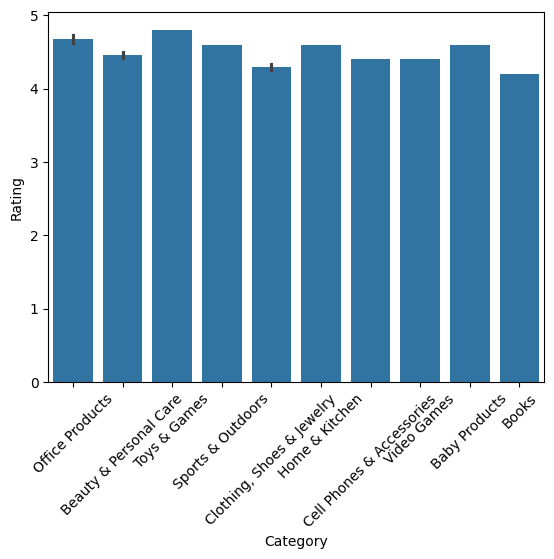

In [52]:
#visualize category wise rating
sns.barplot(data=data, x='Category', y='Rating')
plt.xticks(rotation=45)
plt.show()

In [53]:
#overall labels propotion
data.Labels.value_counts(normalize=True)


Labels
positive    0.645570
neutral     0.297468
negative    0.056962
Name: proportion, dtype: float64

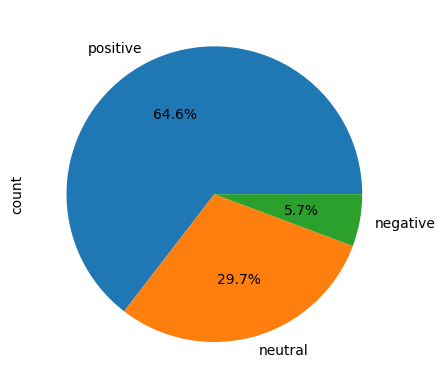

In [54]:
#plotting pie chart
data.Labels.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

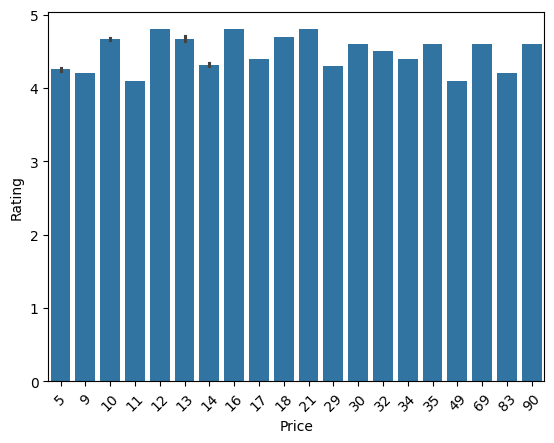

In [55]:
#visualize price wise rating
sns.barplot(data=data, x='Price', y='Rating')
plt.xticks(rotation=45)
plt.show()

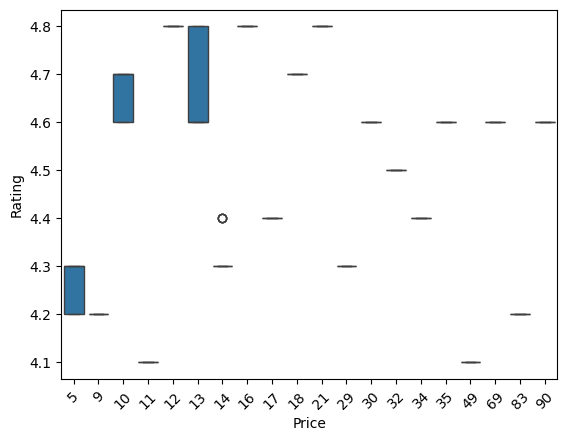

In [56]:
#how does price affect rating
sns.boxplot(data=data, x='Price', y='Rating')
plt.xticks(rotation=45)
plt.show()